# <b>Kaggle Heart Disease Project Part II </b>
# December 2019

# <b>Modeling Data Analysis </b> 

Data taken from site : https://www.kaggle.com/ronitf/heart-disease-uci and additional descriptions for the features is taken from https://archive.ics.uci.edu/ml/datasets/heart+Disease  

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. 

Columns descriptions:


- A. <a href='age :'> age :</a>	 in years
- B. <a href='age :'> sex :</a>	 (1 = male; 0 = female)
- C. <a href='age :'> cp :</a>	chest pain type experienced defined as (0-4) 
        - (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- D. <a href='age :'> trestbps:</a>	resting blood pressure (in mm Hg on admission to the hospital)
- E. <a href='age :'> chol :</a>  serum cholestoral measurement in mg/dL
- F. <a href='age :'> fbs :</a>	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- G. <a href='age :'> restecg :</a>	resting electrocardiographic measurement defined as 
        - (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- H. <a href='age :'> thalach :</a>	 maximum heart rate achieved
- I. <a href='age :'> exang :</a>	exercise induced angina (1 = yes; 0 = no) 
- J. <a href='age :'> oldpeak :</a>	 ST depression induced by exercise relative to rest. 'ST' relates to isoelectric period when the ventricles are in between depolarization and repolarization on the ECG plot. ST depression can be associated with myocardial infarction. 
- K. <a href='age :'> slope :</a>	 the slope of the peak exercise ST segment defined as
        - (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- L. <a href='age :'> ca :</a>	number of major vessels (0-3) colored by flouroscopy
- M. <a href='age :'> tha :</a>	A blood disorder called thalassemia defined as 
        - 3 = normal; 6 = fixed defect; 7 = reversable defect
- N. <a href='age :'> target : </a>	presence of heart disease (1 = presence of heart disease or 0 = presence of heart disease)

We can divide the features above into two groups: quantitative and categorical
  - <i>Quantitative features: </i> Age, trestbps, chol, thalach, oldpeak
  - <i>Categorical features: </i> sex, cp, fbs, restecg, exang, slope, ca, thal

In [60]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
import statistics as st
import warnings
import nbconvert
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf


# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks", color_codes=True)

# Import Machine Learning libraries for modeling in order to train and test the data.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression







In [61]:
heart_df = pd.read_csv('heart.csv')

In [62]:
heart_df = heart_df.drop_duplicates()

In [63]:
heart_df.shape

(302, 14)

In [64]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [65]:
heart_df_new = heart_df[(heart_df['chol']< 500) & (heart_df['ca']< 4)]
heart_df_new.shape

(297, 14)

In [66]:
heart_df_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# <b>Reset Index  </b> 
  - After viewing the dataset in EDA, it appears that the patients with heart disease are listed first, then patients that do not have heart disease are listed last. I need to randomize the data by resetting the index. 


In [67]:
ht_df_nw_rt_in=heart_df_new.sample(frac=1).reset_index(drop=True)
ht_df_nw_rt_in.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
1,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
2,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
3,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
4,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
5,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
6,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
7,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
8,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
9,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0


## Conclusions
- Since I am going to use this data for Machine_learning, I want to take the index and randomize its order as shown above. 

# <b>Feature Engineering-Normalization </b> 

In [68]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm
heart_df_new_normalized = normalize(heart_df_new)

# Why I am normalizing the data 
   - It is importnant to  prevent numerical inaccuracies and any limitation the computational power required. Another reason is some machine learning algorithms can handle that data better when it is normalized and will help the algorithms work efficiently. I am going to test using the k-nearest neighbors, which the scale of a particular feature plays a role of a weight. The bigger are the values the more important is the feature. In the case of the neural networks, normalization may speeds up the training. On the other hand, the decision tree based algorithms is not effected by normalization of the data.

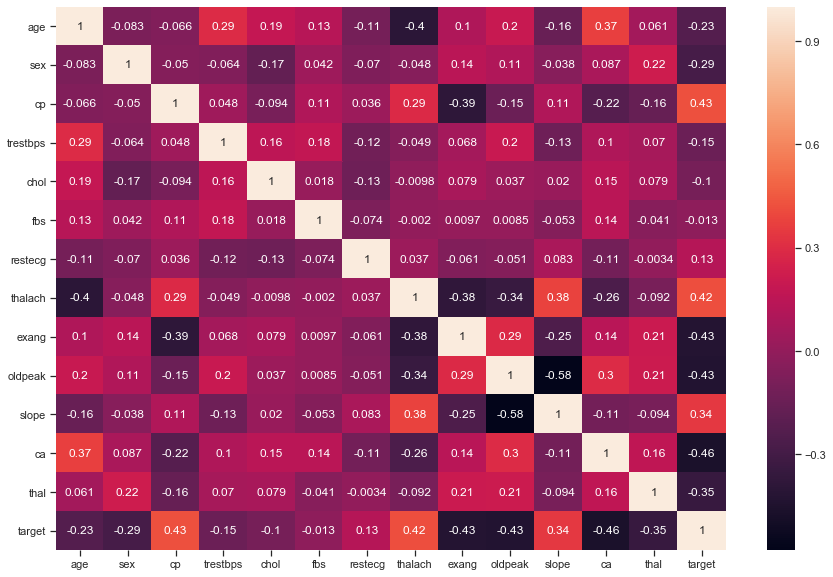

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_df_new_normalized.corr(), annot=True)

- Conclusions:
  - The values show the correlation score between the row and column at each point. Values will range up to from 1 (very strong positve correlation) to -1 (very strong negative correlation, or 0 (no relationship). 
  - This heatmap confirms the conclusions I made for the heatmap in my EDA notebook. 
      - I find no feature that has a significant correlation with the target value. 
      - Some features have a lower positive correlation with the target value, which includes the features cp, thalach, and slope. 
      - Some features have a negative correlation with the target value, which includes the features exang, oldpeak, ca, and thal. 

In [70]:
# Fit regression model (using the natural log of one of the regressors)
linear_formula = 'target ~ age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal'
lm = smf.ols(formula=linear_formula, data=heart_df_new_normalized).fit()

In [71]:
print(lm.rsquared)

0.5335105662706251


In [72]:
print(lm.params)

Intercept    0.771093
age          0.032783
sex         -0.201402
cp           0.306139
trestbps    -0.234566
chol        -0.103877
fbs          0.040408
restecg      0.071234
thalach      0.378178
exang       -0.140160
oldpeak     -0.267772
slope        0.190239
ca          -0.431290
thal        -0.362742
dtype: float64


## Conclusions
- R-squared shows how well the regression line fits. Since the R-squared value of ~0.5335, it indicates that the regression line fits the set of data points. The intercept is 0.77. Age, cp, fbs, restecg, thalach, and slope have positive values. The other features have negative values. 


# Categorical Feature Conversion
  - After exploring the dataset, I observed that there are some categorical features: sex, cp, fbs, restecg, exang, slope, ca, and thal. These features will need to be converted into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [73]:
heart_df_new_normalized_fc = pd.get_dummies(heart_df_new_normalized, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Taken from datacamp site: 
Because a small change in the feature which has a lower value range than the other feature may not have a significant impact on those other features. It affects the process of good learning. Dealing with this problem is known as data scaling.

In [74]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df_new_normalized_fc [columns_to_scale] = standardScaler.fit_transform(heart_df_new_normalized_fc [columns_to_scale])

# Using Machine Learning Algorithms to train and test dataset

  - After applying data scaling to dataset, I can import the data so I can split the dataset into training and testing datasets. 

In [75]:
y = heart_df_new_normalized_fc ['target']
X = heart_df_new_normalized_fc .drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [80]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    prediction = knn_classifier.predict(X_test)
    knn_score = round(knn_classifier.score(X_test, y_test), 3) *100
    knn_scores.append(knn_classifier.score(X_test, y_test))
    
    
    

I have the scores for different neighbor values in the array knn_scores. I will plot it and see for which value of K have the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

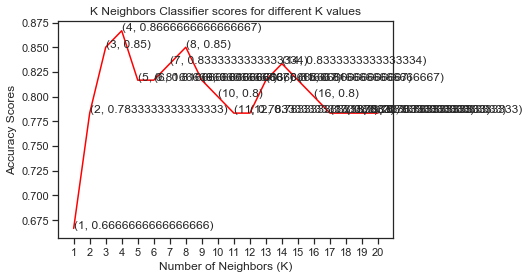

In [81]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was ~0.87 for the 8 neighbors.

In [82]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 85.0% with 8 nieghbors.


#### Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem. I'll test max features to determine which returns the best accuracy.

In [85]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    score = round(knn_classifier.score(X_test, y_test), 3) *100
    dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

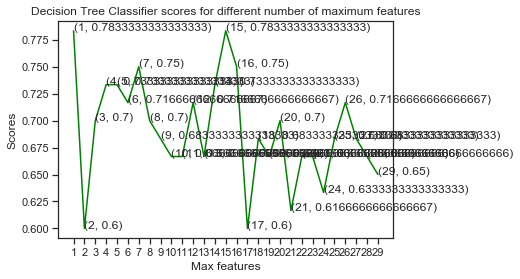

In [86]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, 2, 4 and 18.

In [87]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 68.33333333333333% with [2, 4, 18] maximum features.


#### Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [89]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

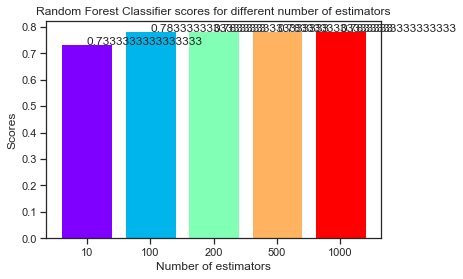

In [91]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [92]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 78.33333333333333% with [100, 500] estimators.


### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. I then applied four Machine Learning algorithms including K Neighbors Classifier, Decision Tree Classifier and Random Forest Classifier. I varied parameters across each model to improve their scores.
In the end, K Neighbors Classifier had achieved the highest score of ~ 87% with 8 nearest neighbors.